<a href="https://colab.research.google.com/github/ssv112/Training_Repo/blob/master/Tensorflow_Projects/Autoencoder_Image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook.. Applications of Autoencoders are explained. Mnist Image data is used to show to use cases of Autoencoders:
1. Reducing the dimensions from 784 to 25 parameters and still keeping most of the important features

2. Noise Removal from Image Data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


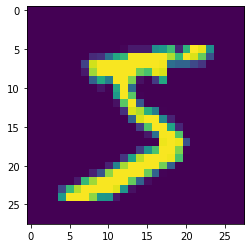

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train= X_train/255
X_test= X_test/255


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

from tensorflow.keras.optimizers import SGD

In [8]:
#784 to 392

In [9]:
encoder= Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))



In [10]:
decoder= Sequential()

decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))



In [11]:
autoencoder=Sequential([encoder,decoder])

In [12]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.2319 - val_loss: 0.1344 - val_accuracy: 0.2388
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.2353 - val_loss: 0.1275 - val_accuracy: 0.2402
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1290 - accuracy: 0.2392 - val_loss: 0.1268 - val_accuracy: 0.2424
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.2426 - val_loss: 0.1224 - val_accuracy: 0.2399
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.2462 - val_loss: 0.1198 - val_accuracy: 0.2453


In [16]:
passed_images= autoencoder.predict(X_test[:10])

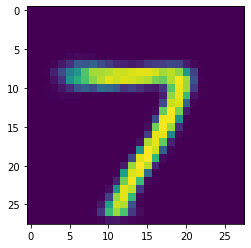

In [18]:
plt.imshow(passed_images[0])

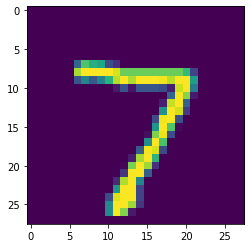

In [19]:
plt.imshow(X_test[0])

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [21]:
sample= GaussianNoise(0.2)

In [22]:
noisy= sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



original Image


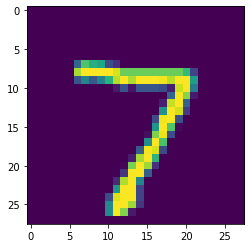

Noisy Image


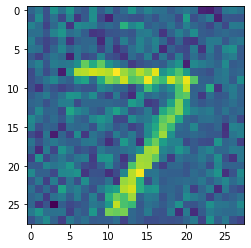

In [27]:
n=0

print("original Image")
plt.imshow(X_test[0])
plt.show()
print("Noisy Image")
plt.imshow(noisy[0])
plt.show()



In [29]:
import tensorflow as tf

In [30]:
tf.random.set_seed(101)
np.random.seed(101)
encoder= Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [31]:
decoder= Sequential()

decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))


In [32]:
noiseremover= Sequential([encoder,decoder])

noiseremover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
noiseremover.fit(X_train,X_train,epochs=8,validation_data=(X_test,X_test))

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1696 - accuracy: 0.1820 - val_loss: 0.1344 - val_accuracy: 0.2253
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1295 - accuracy: 0.2308 - val_loss: 0.1197 - val_accuracy: 0.2429
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1206 - accuracy: 0.2446 - val_loss: 0.1145 - val_accuracy: 0.2573
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1154 - accuracy: 0.2544 - val_loss: 0.1103 - val_accuracy: 0.2649
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1116 - accuracy: 0.2615 - val_loss: 0.1073 - val_accuracy: 0.2612
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1091 - accuracy: 0.2656 - val_loss: 0.1051 - val_accuracy: 0.2629
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071 - accuracy: 0.2692 - val_loss: 0.1035 - val_accuracy: 0.2661

In [35]:
ten_noisy_images= sample(X_test[:10],training=True)

In [36]:
denoised= noiseremover(ten_noisy_images)

Original Image


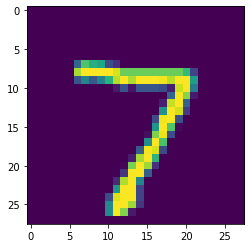

Noisy Image


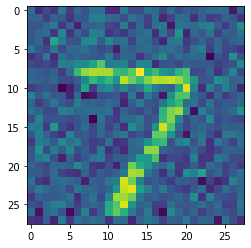

Image after Noise Removal


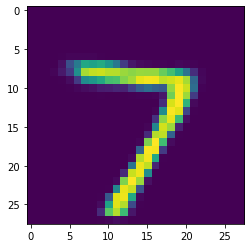

In [37]:
n=0
print('Original Image')
plt.imshow(X_test[0])

plt.show()

print('Noisy Image')
plt.imshow(ten_noisy_images[0])
plt.show()

print('Image after Noise Removal')
plt.imshow(denoised[0])
plt.show()

